<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-10_February-24-2026/Lecture-10_BinaryClassification-2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 10 - Binary Classification

Here, we are going to continue to consider binary classifcation and consider the same data as in Lecture 9.

We will consider data from this paper:
- Enhancing Permeability Prediction of Heterobifunctional Degraders Using Machine Learning and Metadynamics-Informed 3D Molecular Descriptors - [DOI:10.1021/acs.jcim.5c01600](https://doi.org/10.1021/acs.jcim.5c01600)

Where the authors consider the Permeability of so-called PROTAC compounds that are large and flexible molecules used in Targeted Protein Degradation.

All the dataset used in the paper, and the code use to obtain the results are given in this following Github repository:
- https://github.com/brykimjh/degrader-permeability-ml3d-metaD  

The specfic dataset that we use 32 PROTACs with measured passive permeability (given in nm/s) and includes 17 features calculated by RDKit (see [here](https://github.com/brykimjh/degrader-permeability-ml3d-metaD/blob/main/data/calculate_2d_properties.py) for the script they are calculated)

The target value is the measured passive permeability that is experimentaly measured.

The dataset can be seen here:
- https://github.com/brykimjh/degrader-permeability-ml3d-metaD/blob/main/data/2d_features.csv

Where the assive permeability is given by `P_app`

In [1]:
# Download dataset

%%bash
dataset_url="https://raw.githubusercontent.com/brykimjh/degrader-permeability-ml3d-metaD/refs/heads/main/data/2d_features.csv"
wget ${dataset_url}
ls

2d_features.csv
2d_features.csv.1
sample_data


--2026-02-25 00:53:41--  https://raw.githubusercontent.com/brykimjh/degrader-permeability-ml3d-metaD/refs/heads/main/data/2d_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10653 (10K) [text/plain]
Saving to: ‘2d_features.csv.1’

     0K ..........                                            100% 15.4M=0.001s

2026-02-25 00:53:41 (15.4 MB/s) - ‘2d_features.csv.1’ saved [10653/10653]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("2d_features.csv")

We now turn the problem into a classification problem by seperating the molecules into molecules with high permeability and low permeability, by using a cutoff of 7 nm/s that will split the data set equally.



In [4]:
Permeable_cutoff = 7.0
Low_label = 0
High_label = +1
Permeable_key_str = f'Permeability High({High_label:})/Low({Low_label:})'
dataset[Permeable_key_str] = [High_label if p > Permeable_cutoff else Low_label for p in dataset['P_app']]

Number_Permeable_High = np.sum(dataset[Permeable_key_str] == +1)
Number_Permeable_Low = np.sum(dataset[Permeable_key_str] == 0)

print("Key:",Permeable_key_str)

print("Number with high permeability (above {:.1f} nm/s): {:d}".format(Permeable_cutoff,Number_Permeable_High))
print("Number with low permeability (above {:.1f} nm/s): {:d}".format(Permeable_cutoff,Number_Permeable_Low))

print("")

dataset[['P_app', Permeable_key_str] ]

Key: Permeability High(1)/Low(0)
Number with high permeability (above 7.0 nm/s): 16
Number with low permeability (above 7.0 nm/s): 16



,P_app,Permeability High(1)/Low(0)
0,31.016125,1
1,11.171392,1
2,6.480741,0
3,2.900000,0
4,0.400000,0
5,49.000000,1
6,13.700000,1
7,3.200000,0
8,17.200000,1
9,1.300000,0


In [5]:
print(dataset.keys())

Index(['Index', 'Compound', 'Smiles', 'P_app AB (nm/s)', 'P_app BA (nm/s)',
       'P_app', 'Molecular Weight (MW)', 'CharVol (characteristic volume)',
       'Flexibility (number of rotatable bonds / number of bonds)',
       'Number of Heavy Atoms (HA)', 'RingAtoms', 'Halogens', 'HeteroAtoms',
       'RotBonds (NRotB)', 'AllBonds', 'RingCount', 'NumStereo',
       'Fraction of sp3 Carbon Atoms (FSP3)', 'Hydrogen Bond Donors (HBD)',
       'Hydrogen Bond Acceptors (HBA)', 'cLogD^7.4',
       'Topological polar surface area (TPSA)',
       'Total non-polar surface area (TNSA)', 'Permeability High(1)/Low(0)'],
      dtype='object')


In [6]:
dataset

,Index,Compound,Smiles,P_app AB (nm/s),P_app BA (nm/s),P_app,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),...,AllBonds,RingCount,NumStereo,Fraction of sp3 Carbon Atoms (FSP3),Hydrogen Bond Donors (HBD),Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA),Permeability High(1)/Low(0)
0,1,6a,O=C(C(N1C(C2=CC=CC(NCCOCCOCCOCCC(N(CC3)CCN3C(C...,2.6,370,31.016125,896.999,803.360,0.253521,65.0,...,71.0,7.0,2.0,0.456522,3.0,14.0,2.64400,209.98,710.02,1
1,2,6b,O=C(C(N1C(C2=CC=CC(NC(COCCOCC(N(CC3)CCN3C(C=C4...,1.3,96,11.171392,852.902,743.496,0.191176,62.0,...,68.0,7.0,2.0,0.395349,3.0,13.0,1.76390,217.82,642.18,1
2,3,6c,O=C(C(N1C(C2=CC=CC(OCC(NCCCCC(N(CC3)CCN3C(C=C4...,1.0,42,6.480741,850.930,753.592,0.191176,62.0,...,68.0,7.0,2.0,0.409091,3.0,12.0,2.45750,208.59,671.41,0
3,4,2d,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,3.5,2,2.900000,1020.210,896.016,0.276316,71.0,...,76.0,6.0,3.0,0.470588,3.0,12.0,7.70720,186.66,833.34,0
4,5,4a,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,0.2,1,0.400000,1012.704,900.176,0.236842,70.0,...,76.0,7.0,3.0,0.460000,5.0,14.0,7.42946,214.98,785.02,0
5,6,2f,CC1(C)C(=O)N(C2=CC=C(C#N)C(C(F)(F)F)=C2)C(=S)N...,17.0,141,49.000000,837.830,697.696,0.265625,59.0,...,64.0,6.0,1.0,0.375000,1.0,12.0,4.40258,177.04,622.96,1
6,7,2b,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,13.5,14,13.700000,1006.183,872.816,0.266667,70.0,...,75.0,6.0,3.0,0.460000,3.0,12.0,7.31710,186.66,813.34,1
7,8,2c,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,2.6,4,3.200000,1128.150,931.232,0.256098,77.0,...,82.0,6.0,3.0,0.470588,3.0,12.0,8.44280,186.66,833.34,0
8,9,2a,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,3.4,86,17.200000,1022.182,891.056,0.276316,71.0,...,76.0,6.0,3.0,0.460000,3.0,13.0,6.55350,195.89,804.11,1
9,10,2e,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...,0.6,3,1.300000,1078.143,902.096,0.253165,74.0,...,79.0,6.0,3.0,0.460000,3.0,12.0,7.80750,186.66,813.34,0


In [7]:
# generate a data frame with just the features and target values
features = dataset.drop(columns=['Index',
                                 'Compound',
                                 'P_app AB (nm/s)',
                                 'P_app BA (nm/s)',
                                 'P_app',
                                 'Smiles',
                                 'Permeability High(1)/Low(0)'])
target = dataset['Permeability High(1)/Low(0)']

In [8]:
features

,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),RingAtoms,Halogens,HeteroAtoms,RotBonds (NRotB),AllBonds,RingCount,NumStereo,Fraction of sp3 Carbon Atoms (FSP3),Hydrogen Bond Donors (HBD),Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA)
0,896.999,803.360,0.253521,65.0,42.0,0.0,19.0,18.0,71.0,7.0,2.0,0.456522,3.0,14.0,2.64400,209.98,710.02
1,852.902,743.496,0.191176,62.0,42.0,0.0,19.0,13.0,68.0,7.0,2.0,0.395349,3.0,13.0,1.76390,217.82,642.18
2,850.930,753.592,0.191176,62.0,42.0,0.0,18.0,13.0,68.0,7.0,2.0,0.409091,3.0,12.0,2.45750,208.59,671.41
3,1020.210,896.016,0.276316,71.0,33.0,3.0,20.0,21.0,76.0,6.0,3.0,0.470588,3.0,12.0,7.70720,186.66,833.34
4,1012.704,900.176,0.236842,70.0,39.0,1.0,20.0,18.0,76.0,7.0,3.0,0.460000,5.0,14.0,7.42946,214.98,785.02
5,837.830,697.696,0.265625,59.0,34.0,3.0,19.0,17.0,64.0,6.0,1.0,0.375000,1.0,12.0,4.40258,177.04,622.96
6,1006.183,872.816,0.266667,70.0,33.0,3.0,20.0,20.0,75.0,6.0,3.0,0.460000,3.0,12.0,7.31710,186.66,813.34
7,1128.150,931.232,0.256098,77.0,33.0,9.0,26.0,21.0,82.0,6.0,3.0,0.470588,3.0,12.0,8.44280,186.66,833.34
8,1022.182,891.056,0.276316,71.0,33.0,3.0,21.0,21.0,76.0,6.0,3.0,0.460000,3.0,13.0,6.55350,195.89,804.11
9,1078.143,902.096,0.253165,74.0,33.0,7.0,24.0,20.0,79.0,6.0,3.0,0.460000,3.0,12.0,7.80750,186.66,813.34


In [9]:
target

,Permeability High(1)/Low(0)
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


### k Nearest Neighbors




Accuracy:                 0.4375
Precision:                0.4545
Recall:                   0.6250


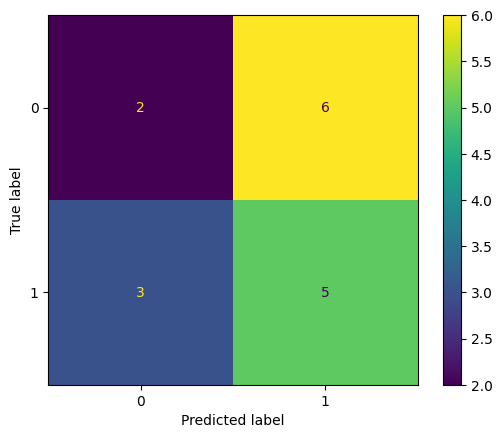

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

n_neighbors=5

#model = RandomForestClassifier(100,max_depth=2)

model = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]
)

model.fit(features_train,target_train)

target_test_predicted = model.predict(features_test)

print("Accuracy:                 {:.4f}".format(metrics.accuracy_score(target_test,target_test_predicted)))
print("Precision:                {:.4f}".format(metrics.precision_score(target_test,target_test_predicted)))
print("Recall:                   {:.4f}".format(metrics.recall_score(target_test,target_test_predicted)))

cfm = metrics.ConfusionMatrixDisplay.from_predictions(target_test,target_test_predicted)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors=5

model = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]
)


scoring = {'accuracy':'accuracy',
            'recall': metrics.make_scorer(metrics.recall_score, zero_division=np.nan),
            'precision': metrics.make_scorer(metrics.precision_score, zero_division=np.nan),
           'roc_auc': 'roc_auc',
           'f1': 'f1'
}


# employ 5-fold CV
scores_fold = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=4, shuffle=True),
    return_train_score=True,
    return_estimator=True,
    return_indices=True
)

# Evaluate the models using crossvalidation
NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.5)
scores_random = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=cv_random,
    return_train_score=True,
    return_estimator=True,
    return_indices=True
)



print("Accuracy - Test")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_accuracy'].mean(),scores_fold['test_accuracy'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))

print("ROC AUC - Test")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_roc_auc'].mean(),scores_fold['test_roc_auc'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_roc_auc'].mean(), scores_random['test_roc_auc'].std()))

print("F1 Score - Test")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_f1'].mean(),scores_fold['test_f1'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_f1'].mean(), scores_random['test_f1'].std()))


print("Precision")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format( np.nanmean(scores_fold['test_precision']),np.nanstd(scores_fold['test_precision'])))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, np.nanmean(scores_random['test_precision']), np.nanstd(scores_random['test_precision'])))




Accuracy - Test
- 5-Fold CV                   : 0.469 +- 0.162
- Random Splits (100 splits) : 0.436 +- 0.102
ROC AUC - Test
- 5-Fold CV                   : 0.469 +- 0.151
- Random Splits (100 splits) : 0.463 +- 0.113
F1 Score - Test
- 5-Fold CV                   : 0.481 +- 0.148
- Random Splits (100 splits) : 0.392 +- 0.173
Precision
- 5-Fold CV                   : 0.483 +- 0.152
- Random Splits (100 splits) : 0.463 +- 0.203


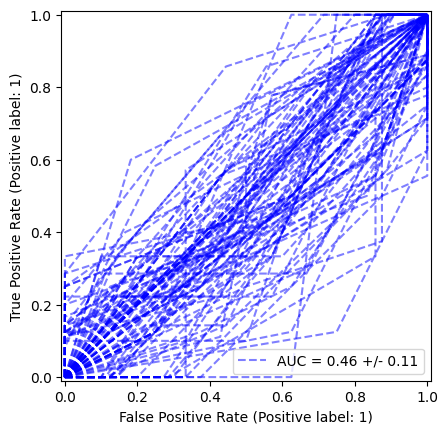

In [12]:
# Only works with sklearn 1.7 or later, can be installed like shown below
# for this to work, you need to enable that the cross validation returns the
# estimator (return_estimator=True) and the indices of the test set (return_indices=True)
metrics.RocCurveDisplay.from_cv_results(scores_random,
                                        features,
                                        target)

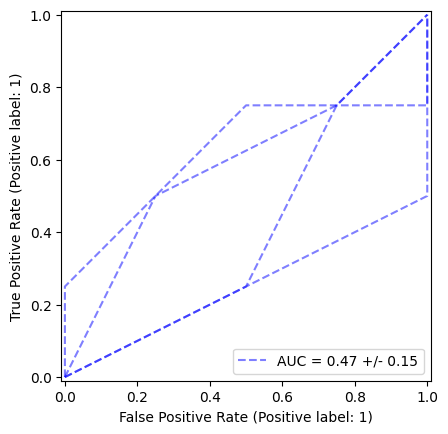

In [13]:
metrics.RocCurveDisplay.from_cv_results(scores_fold,
                                        features,
                                        target)

In [14]:
scores_fold

{'fit_time': array([0.0079596 , 0.01015925, 0.01187229, 0.01290774]),
 'score_time': array([0.05803895, 0.0284431 , 0.03980851, 0.03985858]),
 'estimator': [Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
  Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
  Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
  Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])],
 'indices': {'train': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 19, 20,
          22, 24, 25, 26, 27, 28, 29]),
   array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 17, 18, 19, 20,
          21, 22, 23, 25, 29, 30, 31]),
   array([ 0,  1,  3,  4,  5,  7,  9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21,
          23, 24, 26, 27, 28, 30, 31]),
   array([ 0,  2,  4,  6,  8,  9, 10, 12, 15, 16, 17, 18, 19, 21, 22, 23, 24,
          25, 26, 27, 28, 29, 30, 31])),
  'test': (array([ 

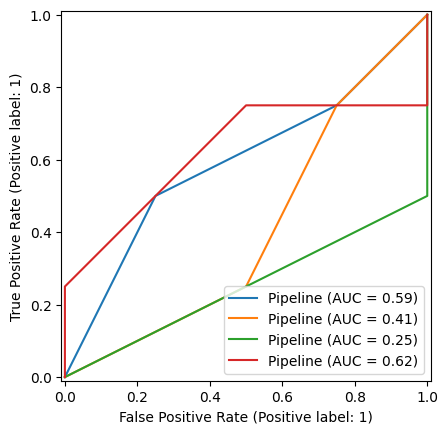

In [15]:
# this works for sklearn 1.6.1
# create a figure to show all together in one figure,
# then need to pass the axis ax to the from_estimator
fig, ax = plt.subplots()
# do a loop over different estimator in the CV
# the scores_fold from cross_validate is a dictonary
# of different objects
for i in range(len(scores_fold['estimator'])):
  # get the estimator
  estimator = scores_fold['estimator'][i]
  # get indices of the test set
  # as we calculate the ROC AUC over the test set only
  test_indices = scores_fold['indices']['test'][i]
  #
  metrics.RocCurveDisplay.from_estimator(estimator,features.iloc[test_indices],target.iloc[test_indices], ax=ax)
plt.show()


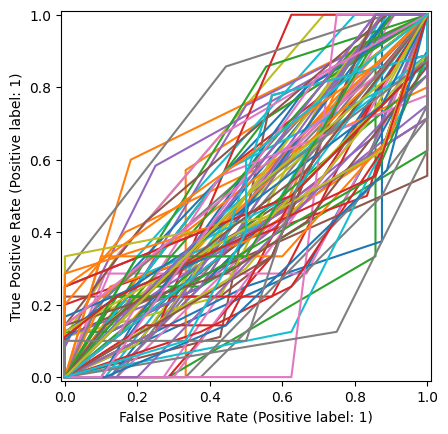

In [16]:
# this works for sklearn 1.6.1
# create a figure to show all together in one figure,
# then need to pass the axis ax to the from_estimator
fig, ax = plt.subplots()
# do a loop over different estimator in the CV
# the scores_fold from cross_validate is a dictonary
# of different objects
for i in range(len(scores_random['estimator'])):
  # get the estimator
  estimator = scores_random['estimator'][i]
  # get indices of the test set
  # as we calculate the ROC AUC over the test set only
  test_indices = scores_random['indices']['test'][i]
  #
  metrics.RocCurveDisplay.from_estimator(estimator,features.iloc[test_indices],target.iloc[test_indices], ax=ax)
# turn off the legend as the figure is otherwise too crowded
ax.get_legend().remove()

In [17]:
!pip list | grep scikit-learn

scikit-learn                             1.8.0


In [18]:
!pip install scikit-learn==1.8.0

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate,ShuffleSplit,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

n_neighbors=8

model = Pipeline(
    steps=[("scaler", RobustScaler()), ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))]
)


scoring = {'accuracy':'accuracy',
            'recall': metrics.make_scorer(metrics.recall_score, zero_division=np.nan),
            'precision': metrics.make_scorer(metrics.precision_score, zero_division=np.nan),
           'roc_auc': 'roc_auc'
}


# employ 5-fold CV
scores_fold = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=4, shuffle=True),
    return_train_score=True,
    return_estimator=True,
    return_indices=True
)

# Evaluate the models using crossvalidation
NumSplits=100
cv_random = ShuffleSplit(n_splits=NumSplits, test_size=0.5)
scores_random = cross_validate(
    model,
    features, target,
    scoring=scoring,
    cv=cv_random,
    return_train_score=True,
    return_estimator=True,
    return_indices=True
)



print("Accuracy - Test")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_accuracy'].mean(),scores_fold['test_accuracy'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_accuracy'].mean(), scores_random['test_accuracy'].std()))

print("ROC AUC - Test")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format(scores_fold['test_roc_auc'].mean(),scores_fold['test_roc_auc'].std()))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, scores_random['test_roc_auc'].mean(), scores_random['test_roc_auc'].std()))

print("Precision")
print("- 5-Fold CV                   : {:.3f} +- {:.3f}".format( np.nanmean(scores_fold['test_precision']),np.nanstd(scores_fold['test_precision'])))
print("- Random Splits ({:d} splits) : {:.3f} +- {:.3f}".format(NumSplits, np.nanmean(scores_random['test_precision']), np.nanstd(scores_random['test_precision'])))




Accuracy - Test
- 5-Fold CV                   : 0.531 +- 0.054
- Random Splits (100 splits) : 0.437 +- 0.092
ROC AUC - Test
- 5-Fold CV                   : 0.562 +- 0.099
- Random Splits (100 splits) : 0.472 +- 0.123
Precision
- 5-Fold CV                   : 0.556 +- 0.079
- Random Splits (100 splits) : 0.407 +- 0.202


In [20]:
perm = dataset['P_app']
perm

,P_app
0,31.016125
1,11.171392
2,6.480741
3,2.900000
4,0.400000
5,49.000000
6,13.700000
7,3.200000
8,17.200000
9,1.300000


In [21]:
dataset['P_appLog'] = np.log10(dataset['P_app'])

In [22]:
dataset['P_app2'] = [np.power(10,e) for e in dataset['P_appLog']]

In [23]:
dataset['P_app3'] = np.power(10,dataset['P_appLog'])

In [24]:
dataset[ ['P_app','P_app2','P_app3'] ]

,P_app,P_app2,P_app3
0,31.016125,31.016125,31.016125
1,11.171392,11.171392,11.171392
2,6.480741,6.480741,6.480741
3,2.900000,2.900000,2.900000
4,0.400000,0.400000,0.400000
5,49.000000,49.000000,49.000000
6,13.700000,13.700000,13.700000
7,3.200000,3.200000,3.200000
8,17.200000,17.200000,17.200000
9,1.300000,1.300000,1.300000


In [25]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/brykimjh/degrader-permeability-ml3d-metaD/refs/heads/main/outputs/ml_models/"
dataset_filename="model_data.csv"

rm -f ${dataset_filename}

wget ${url}/${dataset_filename} &> /dev/null

ls

2d_features.csv
2d_features.csv.1
model_data.csv
sample_data


In [26]:
dataset_1 = pd.read_csv("model_data.csv")
dataset_2 = pd.read_csv("2d_features.csv")

In [27]:
dataset_1

,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),RingAtoms,Halogens,HeteroAtoms,RotBonds (NRotB),AllBonds,RingCount,...,Fraction of sp3 Carbon Atoms (FSP3),Hydrogen Bond Donors (HBD),Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA),Ensemble_Average_PSA_Chloroform_ANI,Ensemble_Average_Num_IMHB_Chloroform_ANI,Ensemble_Average_RadiusOfGyration_Chloroform_ANI,P_appLog
0,896.999,803.360,0.253521,65,42,0,19,18,71,7,...,0.456522,3,14,2.64400,209.98,710.02,193.71,0.97,5.68,1.491362
1,852.902,743.496,0.191176,62,42,0,19,13,68,7,...,0.395349,3,13,1.76390,217.82,642.18,252.14,0.87,5.24,1.049218
2,850.930,753.592,0.191176,62,42,0,18,13,68,7,...,0.409091,3,12,2.45750,208.59,671.41,248.01,0.67,5.47,0.812913
3,1020.210,896.016,0.276316,71,33,3,20,21,76,6,...,0.470588,3,12,7.70720,186.66,833.34,186.01,0.60,5.84,0.462398
4,1012.704,900.176,0.236842,70,39,1,20,18,76,7,...,0.460000,5,14,7.42946,214.98,785.02,105.63,2.92,5.60,-0.397940
5,837.830,697.696,0.265625,59,34,3,19,17,64,6,...,0.375000,1,12,4.40258,177.04,622.96,204.17,0.29,5.23,1.690196
6,1006.183,872.816,0.266667,70,33,3,20,20,75,6,...,0.460000,3,12,7.31710,186.66,813.34,175.16,0.32,5.41,1.136721
7,1128.150,931.232,0.256098,77,33,9,26,21,82,6,...,0.470588,3,12,8.44280,186.66,833.34,160.07,0.93,5.93,0.505150
8,1022.182,891.056,0.276316,71,33,3,21,21,76,6,...,0.460000,3,13,6.55350,195.89,804.11,197.66,1.64,5.16,1.235528
9,1078.143,902.096,0.253165,74,33,7,24,20,79,6,...,0.460000,3,12,7.80750,186.66,813.34,217.11,0.00,5.63,0.113943


In [28]:
dataset_1['P_app'] = dataset_2['P_app']
dataset_1['Smiles'] = dataset_2['Smiles']

In [29]:
dataset_1

,Molecular Weight (MW),CharVol (characteristic volume),Flexibility (number of rotatable bonds / number of bonds),Number of Heavy Atoms (HA),RingAtoms,Halogens,HeteroAtoms,RotBonds (NRotB),AllBonds,RingCount,...,Hydrogen Bond Acceptors (HBA),cLogD^7.4,Topological polar surface area (TPSA),Total non-polar surface area (TNSA),Ensemble_Average_PSA_Chloroform_ANI,Ensemble_Average_Num_IMHB_Chloroform_ANI,Ensemble_Average_RadiusOfGyration_Chloroform_ANI,P_appLog,P_app,Smiles
0,896.999,803.360,0.253521,65,42,0,19,18,71,7,...,14,2.64400,209.98,710.02,193.71,0.97,5.68,1.491362,31.016125,O=C(C(N1C(C2=CC=CC(NCCOCCOCCOCCC(N(CC3)CCN3C(C...
1,852.902,743.496,0.191176,62,42,0,19,13,68,7,...,13,1.76390,217.82,642.18,252.14,0.87,5.24,1.049218,11.171392,O=C(C(N1C(C2=CC=CC(NC(COCCOCC(N(CC3)CCN3C(C=C4...
2,850.930,753.592,0.191176,62,42,0,18,13,68,7,...,12,2.45750,208.59,671.41,248.01,0.67,5.47,0.812913,6.480741,O=C(C(N1C(C2=CC=CC(OCC(NCCCCC(N(CC3)CCN3C(C=C4...
3,1020.210,896.016,0.276316,71,33,3,20,21,76,6,...,12,7.70720,186.66,833.34,186.01,0.60,5.84,0.462398,2.900000,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...
4,1012.704,900.176,0.236842,70,39,1,20,18,76,7,...,14,7.42946,214.98,785.02,105.63,2.92,5.60,-0.397940,0.400000,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...
5,837.830,697.696,0.265625,59,34,3,19,17,64,6,...,12,4.40258,177.04,622.96,204.17,0.29,5.23,1.690196,49.000000,CC1(C)C(=O)N(C2=CC=C(C#N)C(C(F)(F)F)=C2)C(=S)N...
6,1006.183,872.816,0.266667,70,33,3,20,20,75,6,...,12,7.31710,186.66,813.34,175.16,0.32,5.41,1.136721,13.700000,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...
7,1128.150,931.232,0.256098,77,33,9,26,21,82,6,...,12,8.44280,186.66,833.34,160.07,0.93,5.93,0.505150,3.200000,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...
8,1022.182,891.056,0.276316,71,33,3,21,21,76,6,...,13,6.55350,195.89,804.11,197.66,1.64,5.16,1.235528,17.200000,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...
9,1078.143,902.096,0.253165,74,33,7,24,20,79,6,...,12,7.80750,186.66,813.34,217.11,0.00,5.63,0.113943,1.300000,CC1=C(C2=CC=C(CNC(=O)[C@@H]3C[C@@H](O)CN3C(=O)...


In [30]:
dataset_1['P_app2'] = np.power(10,dataset_1['P_appLog'])

In [31]:
dataset_1[ ['P_app','P_app2'] ]

,P_app,P_app2
0,31.016125,31.0
1,11.171392,11.2
2,6.480741,6.5
3,2.900000,2.9
4,0.400000,0.4
5,49.000000,49.0
6,13.700000,13.7
7,3.200000,3.2
8,17.200000,17.2
9,1.300000,1.3
